Download neccessary package

In [1]:
! pip install biopython
! pip install logomaker

     |████████████████████████████████| 2.3 MB 4.2 MB/s 
     |████████████████████████████████| 11.8 MB 5.3 MB/s 


Getting alignment files

In [2]:
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/Mus_musculus/alignments.fasta'
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/Mus_musculus/downstream_alignments.fasta'
! wget 'https://github.com/sonluongvu/Palm_structure/raw/main/Mus_musculus/upstream_alignments.fasta'

--2022-01-24 23:46:29--  https://github.com/sonluongvu/Palm_structure/raw/main/Mus_musculus/alignments.fasta
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sonluongvu/Palm_structure/main/Mus_musculus/alignments.fasta [following]
--2022-01-24 23:46:29--  https://raw.githubusercontent.com/sonluongvu/Palm_structure/main/Mus_musculus/alignments.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60513 (59K) [text/plain]
Saving to: ‘alignments.fasta’

alignments.fasta    100%[===================>]  59.09K  --.-KB/s    in 0.01s   

2022-01-24 23:46:29 (5.22 MB/s) - ‘alignments.fasta’ saved [60513/6

Import libraries

In [3]:
import pandas as pd
import numpy as np
from Bio import AlignIO
import matplotlib.pyplot as plt
%matplotlib inline
plt.ion()

import logomaker as lm

Parse alignment files

In [4]:
alignment = AlignIO.read(open('/content/alignments.fasta'), 'fasta')
print(alignment[:5])

Alignment with 5 rows and 201 columns
TNLADRELVHMINWAKRVPGFGDLNLHDQVHLLECAWLEILMIG...DAH SPALMS25
--------------------------------------------...LSF SPALMS28
--------------------------------------------...HKG SPALMS29
--------------------------------------------...ARD SPALMS31
--------------------------------------------...AHA SPALMS32


Extracting sequences from alignment (15 aa upstream and downstream)

In [11]:
alignment_seq = []
for record in alignment:
  alignment_seq.append(str(record.seq)[85:116])
len(alignment_seq[1])

31

Create matrix from alignment sequence

In [12]:
counts_mat = lm.alignment_to_matrix(sequences=alignment_seq, to_type='probability', characters_to_ignore='.-X')
counts_mat.head()

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
pos,,,,,,,,,,,,,,,,,,,,
0,0.106280,0.024155,0.086957,0.057971,0.033816,0.038647,0.033816,0.062802,0.028986,0.106280,0.048309,0.043478,0.043478,0.019324,0.048309,0.057971,0.019324,0.077295,0.024155,0.038647
1,0.115942,0.028986,0.038647,0.038647,0.043478,0.096618,0.033816,0.028986,0.033816,0.096618,0.038647,0.028986,0.072464,0.043478,0.043478,0.062802,0.014493,0.062802,0.004831,0.072464
2,0.067308,0.043269,0.057692,0.043269,0.048077,0.048077,0.019231,0.043269,0.028846,0.076923,0.033654,0.043269,0.100962,0.052885,0.048077,0.096154,0.048077,0.081731,0.004808,0.014423
3,0.047619,0.023810,0.028571,0.057143,0.042857,0.071429,0.009524,0.014286,0.038095,0.152381,0.071429,0.033333,0.019048,0.042857,0.085714,0.095238,0.033333,0.090476,0.028571,0.014286
4,0.093458,0.037383,0.051402,0.056075,0.028037,0.042056,0.023364,0.032710,0.037383,0.084112,0.037383,0.032710,0.042056,0.028037,0.079439,0.107477,0.056075,0.056075,0.042056,0.032710


Create logo matrix

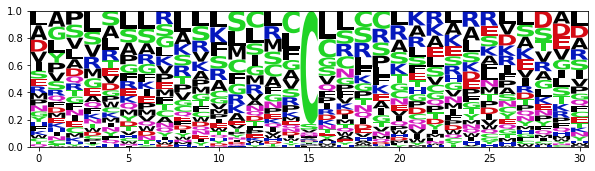

In [13]:
lm.Logo(counts_mat)